In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [350]:
train_data = pd.read_csv(r"C:\Users\ZHOU-JC\Desktop\data match\House Prices Advanced Regression Techniques/train.csv")
test_data = pd.read_csv(r"C:\Users\ZHOU-JC\Desktop\data match\House Prices Advanced Regression Techniques/test.csv")
all_data = train_data.append(test_data, sort=False).reset_index()

# 对数据进行初步判断

In [3]:
train_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

UndefinedVariableError: name 'SalePrcie' is not defined

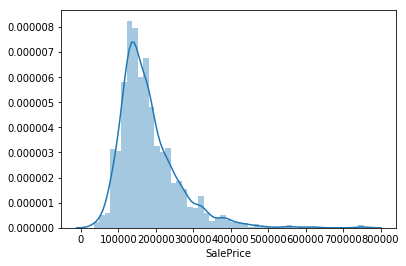

In [9]:
# 有离群点
train_data['SalePrice'].describe()
sns.distplot(train_data['SalePrice'])
train_data.query('SalePrcie>500000')

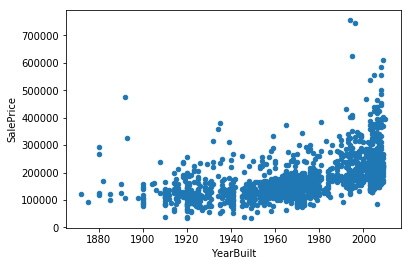

In [19]:
# y与数值型特征的关系
train_data.plot(kind='scatter', x='YearBuilt', y='SalePrice')

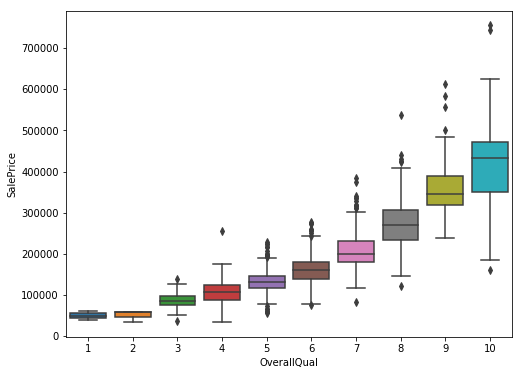

In [18]:
# y与类别形特征的关系
f, ax = plt.subplots(figsize=(8,6))
fig = sns.boxplot(x='OverallQual', y='SalePrice', data=train_data)

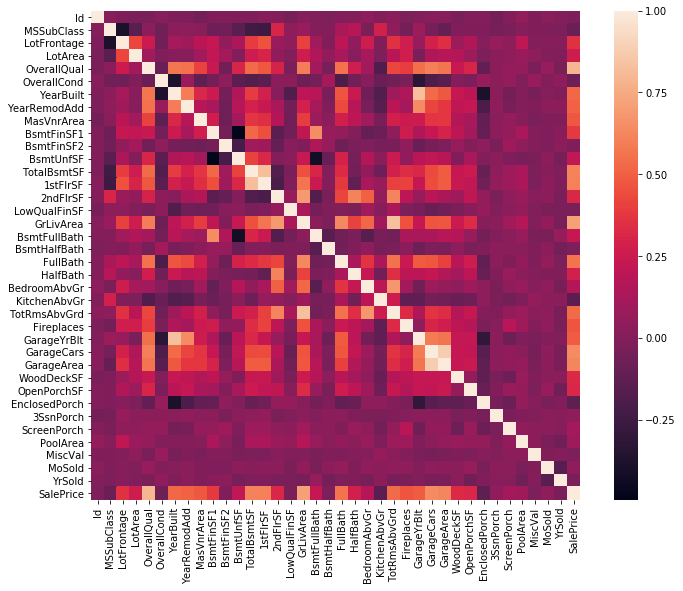

In [40]:
# 相关性分析
corrmat = train_data.corr()
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, square=True)
#可以看到TotalBsmtSF 和 1stFlrSF 地下室面积和首层面积
#YearBuilt 和 GarageYrBlt 建造年份和车库建造年份
#GrLivArea 和 TotRmsAbvGrd 地面以上居住面积和地上卧室以外的房间数

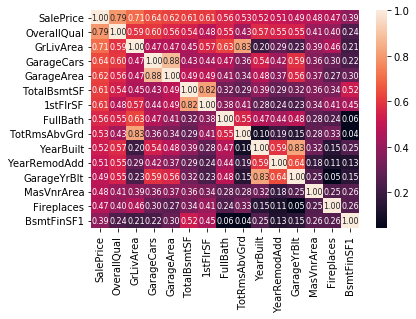

In [67]:
# 找前10个
cols = corrmat.nlargest(15, 'SalePrice')['SalePrice'].index.tolist()
sub_corrmat = corrmat.loc[cols, cols]
sns.heatmap(sub_corrmat, annot=True, fmt='.2f', annot_kws={'size':8})

D:\software\anaconda\envs\python36\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


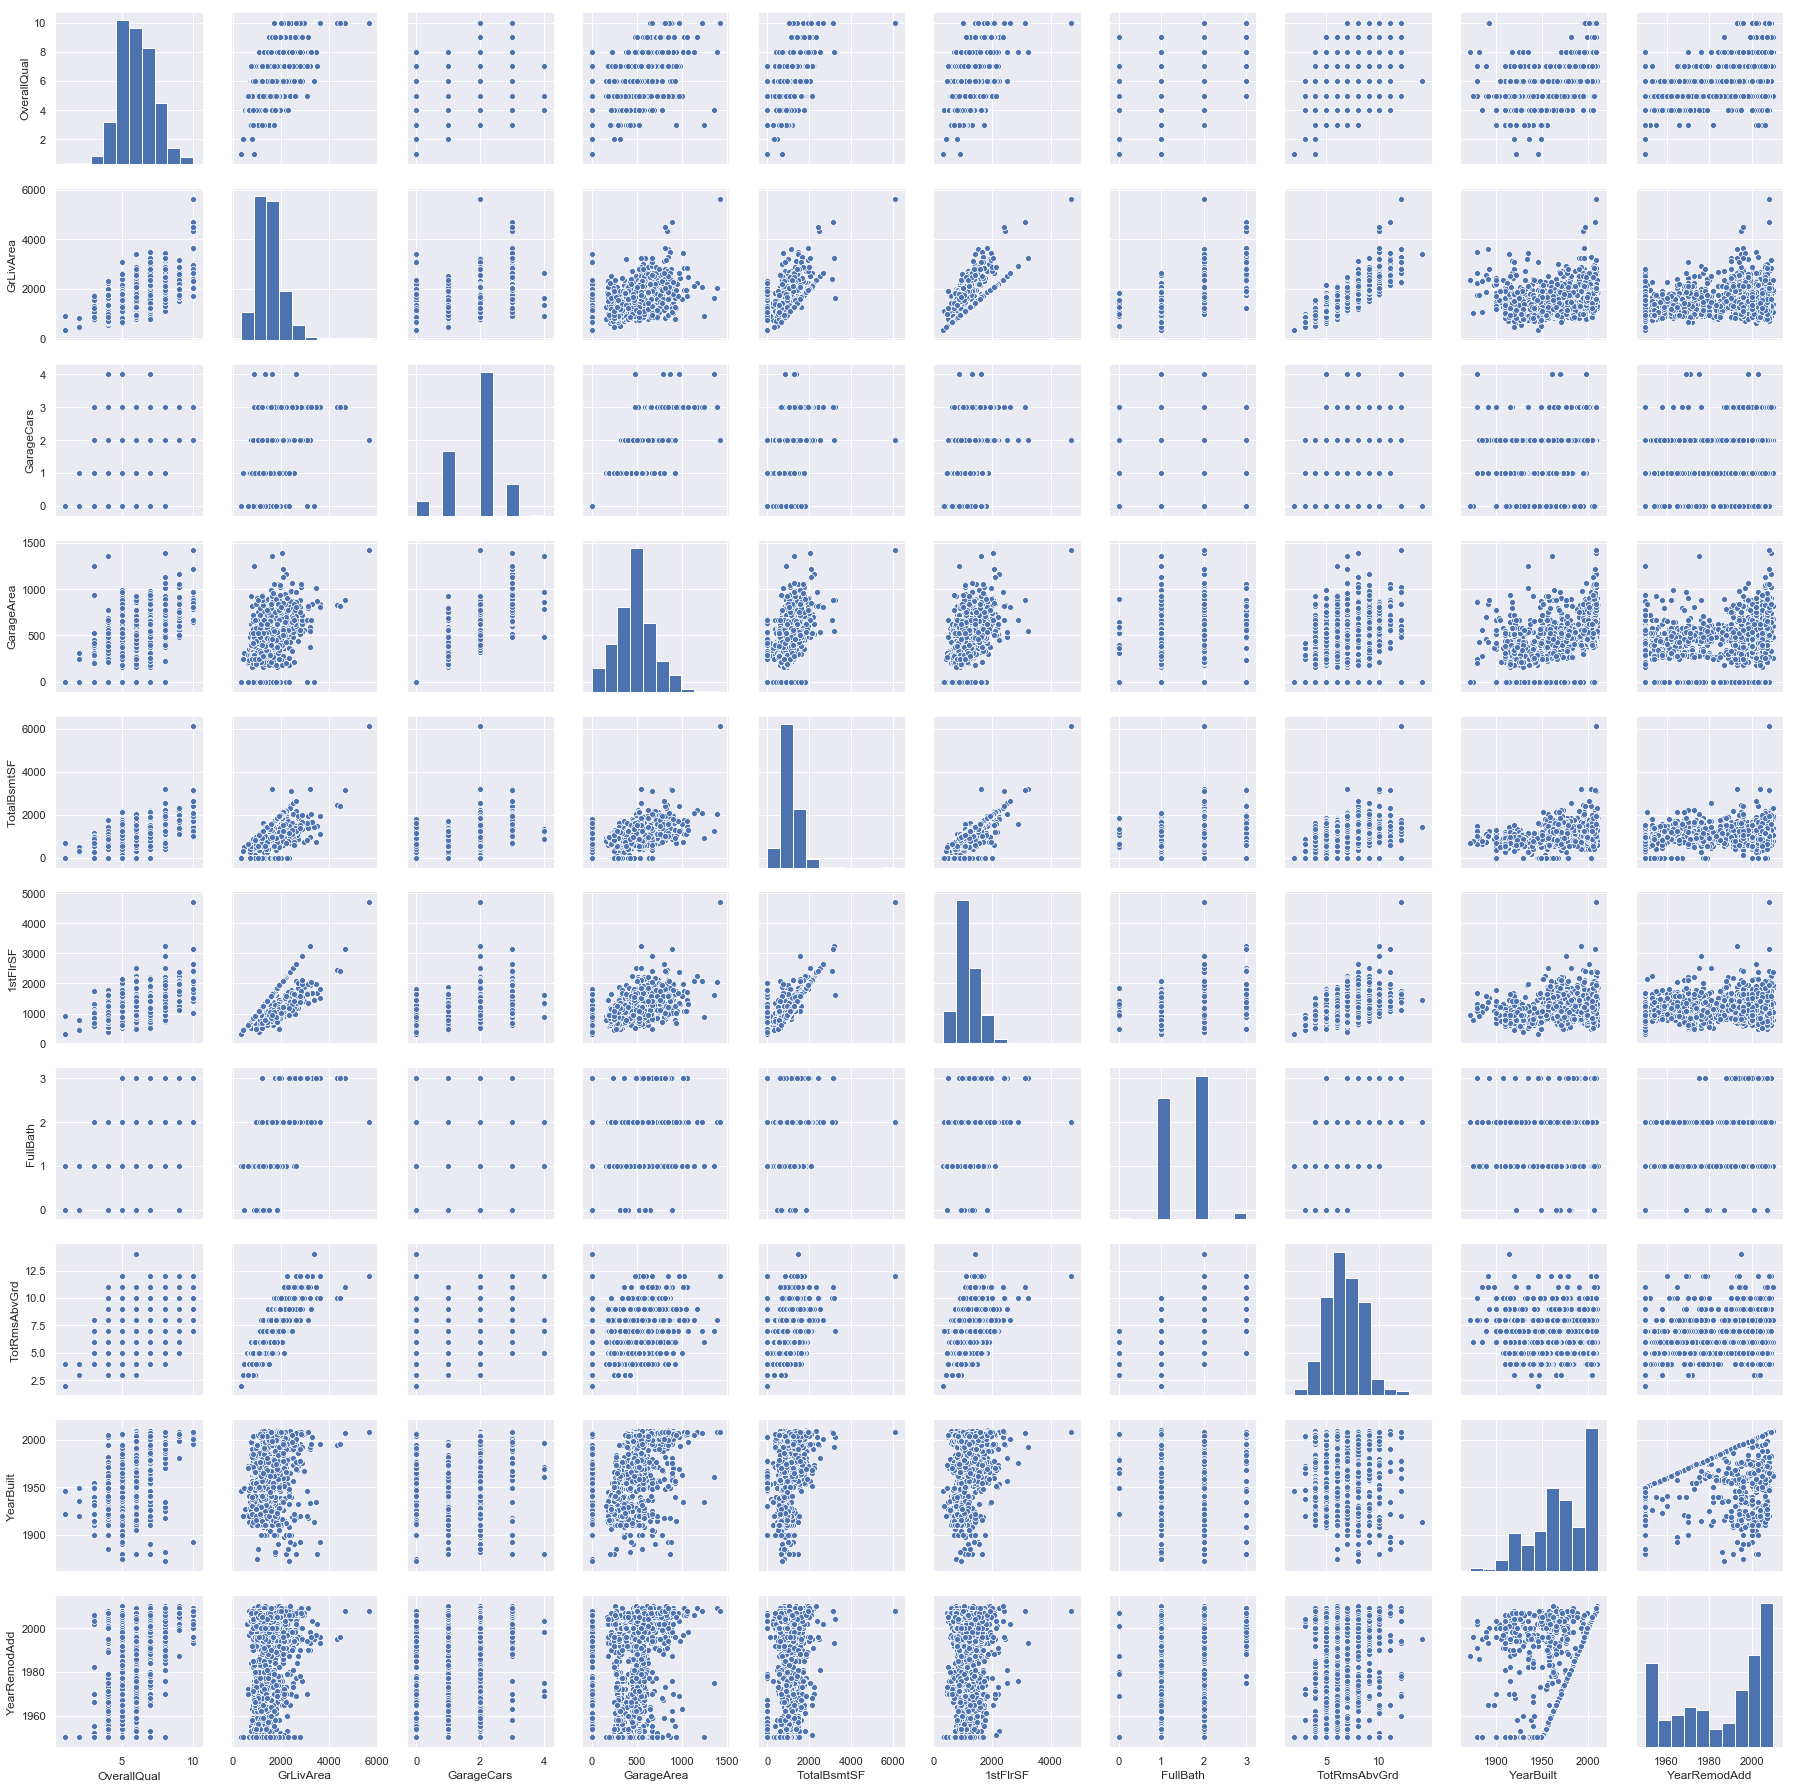

In [72]:
# scatterplot
sns.set()
cols=['OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF','FullBath','TotRmsAbvGrd','YearBuilt','YearRemodAdd']
sns.pairplot(train_data[cols], height=2.5)

# 缺失值的处理

In [353]:
total = all_data.isnull().sum().sort_values(ascending=False)
percent = (all_data.isnull().sum())/all_data.isnull().count().sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, sort=False, keys=['Total', 'Percent'])
missing_data[missing_data['Percent'] > 0]

,Total,Percent
SalePrice,1459,0.499829


In [352]:
# PoolQc 泳池面积
all_data.drop('PoolQC', axis=1, inplace=True)
# MiscFeature 其他特征
all_data.drop('MiscFeature', axis=1, inplace=True)
# Alley 巷子类别
all_data.drop('Alley', axis=1, inplace=True)
# Fence 围墙质量
all_data.drop('Fence', axis=1, inplace=True)
# FireplaceQu 壁炉质量 Fireplaces壁炉数量为0的话 也就没有壁炉了
all_data.loc[all_data['Fireplaces']==0, 'FireplaceQu'] = 'none'
# LotFrontage 距离街道的直线距离 
all_data.drop('LotFrontage', axis=1, inplace=True)
# GarageQual 车库质量
all_data['GarageQual'].fillna('none', inplace=True)
# GarageYrBlt 车库建造年份
all_data.drop('GarageYrBlt', axis=1, inplace=True)
# GarageFinish 车库内饰
all_data['GarageFinish'].fillna('none', inplace=True)
# GarageCond 车库条件
all_data['GarageCond'].fillna('none', inplace=True)
# GarageType 车库类型 一般 删除吧
all_data.drop('GarageType', axis=1, inplace=True)
# BsmtExposure 花园地下室墙 删除
all_data.drop('BsmtExposure', axis=1 , inplace=True)
# BsmtCond 地下室概况
all_data['BsmtCond'].fillna('none', inplace=True)
# BsmtQual 地下室高度
all_data['BsmtQual'].fillna('none', inplace=True)
# BsmtFinType2 地下室装饰质量
# BsmtFinType1 地下室装饰质量
all_data.drop(['BsmtFinType2','BsmtFinType1'], axis=1, inplace=True)
# MasVnrType 砌体饰面类型
all_data.drop('MasVnrType', axis=1, inplace=True)
# MasVnrArea 砌体饰面面积
all_data.drop('MasVnrArea', axis=1, inplace=True)
# MSZoning 区域分类
all_data.drop('MSZoning', axis=1, inplace=True)
# Utilities 公共设施类型
all_data.drop('Utilities', axis=1, inplace=True)
# Functional 房屋功能性评级
all_data.drop('Functional', axis=1, inplace=True)
# BsmtHalfBath 地下室半浴室
all_data.drop('BsmtHalfBath', axis=1, inplace=True)
# BsmtFullBath 地下室全浴室
all_data['BsmtFullBath'].fillna(0, inplace=True)
# GarageArea 车库面积
all_data['GarageArea'].fillna(0, inplace=True)
# GarageCars 车库车容量大小
all_data['GarageCars'].fillna(0, inplace=True)
# Exterior2nd 住宅外墙
# Exterior1st 住宅外墙
all_data.drop('Exterior2nd', axis=1, inplace=True)
all_data.drop('Exterior1st', axis=1, inplace=True)
# SaleType 交易类型
all_data['SaleType']=all_data['SaleType'].map(lambda x:'WD' if x=='WD' else 'other')
# BsmtFinSF1 地下室装饰面积
all_data['BsmtFinSF1'].fillna(0, inplace=True)
# BsmtFinSF2 地下室装饰面积 
all_data['BsmtFinSF2'].fillna(0, inplace=True)
# TotalBsmtSF 地下室总面积
all_data['TotalBsmtSF'].fillna(0, inplace=True)
# BsmtUnfSF 地下室未装饰面积
all_data.drop('BsmtUnfSF', axis=1, inplace=True)
# Electrical 电力系统
all_data['Electrical']=all_data['Electrical'].map(lambda x:'SBrkr' if x=='SBrkr' else 'other')
# KitchenQual 厨房质量
all_data['KitchenQual'].fillna('TA', inplace=True)


In [200]:
all_data.loc[all_data['TotalBsmtSF'].isnull()].T[30:50]

,2120
Foundation,PConc
BsmtQual,NaN
BsmtCond,NaN
BsmtExposure,NaN
BsmtFinType1,NaN
BsmtFinSF1,NaN
BsmtFinType2,NaN
BsmtFinSF2,NaN
BsmtUnfSF,NaN
TotalBsmtSF,NaN


In [183]:
all_data['KitchenAbvGr']==1

0        True
1        True
2        True
3        True
4        True
5        True
6        True
7        True
8       False
9       False
10       True
11       True
12       True
13       True
14       True
15       True
16       True
17      False
18       True
19       True
20       True
21       True
22       True
23       True
24       True
25       True
26       True
27       True
28       True
29       True
        ...  
2889     True
2890     True
2891     True
2892    False
2893     True
2894     True
2895     True
2896     True
2897    False
2898     True
2899     True
2900     True
2901     True
2902     True
2903     True
2904     True
2905    False
2906     True
2907     True
2908    False
2909     True
2910     True
2911     True
2912     True
2913     True
2914     True
2915     True
2916     True
2917     True
2918     True
Name: KitchenAbvGr, Length: 2919, dtype: bool

In [175]:
all_data['KitchenQual'].value_counts()

TA    1492
Gd    1151
Ex     205
Fa      70
Name: KitchenQual, dtype: int64

In [ ]:
all_

In [165]:
train_data.plot(kind='scatter', x='a', y='SalePrice')

KeyError: 'a'

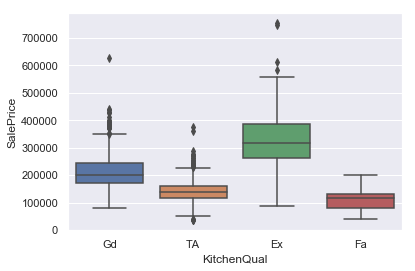

In [203]:
sns.boxplot(x='KitchenQual', y ='SalePrice', data=all_data)

# 查看SalePrice的特殊值

In [209]:
# 删除异常值

train_data.sort_values(by = 'GrLivArea', ascending = False)[:2]
train_data = train_data.drop(train_data[train_data['Id'] == 1299].index)
train_data = train_data.drop(train_data[train_data['Id'] == 524].index)

,523,691,1182,1298
Id,524,692,1183,1299
MSSubClass,60,60,60,60
MSZoning,RL,RL,RL,RL
LotFrontage,130,104,160,313
LotArea,40094,21535,15623,63887
Street,Pave,Pave,Pave,Pave
Alley,NaN,NaN,NaN,NaN
LotShape,IR1,IR1,IR1,IR3
LandContour,Bnk,Lvl,Lvl,Bnk
Utilities,AllPub,AllPub,AllPub,AllPub


In [211]:
train_data.query('GrLivArea > 4000').T

,691,1182
Id,692,1183
MSSubClass,60,60
MSZoning,RL,RL
LotFrontage,104,160
LotArea,21535,15623
Street,Pave,Pave
Alley,NaN,NaN
LotShape,IR1,IR1
LandContour,Lvl,Lvl
Utilities,AllPub,AllPub


In [354]:
train_data = train_data.drop(train_data[train_data['Id'] == 1299].index)
train_data = train_data.drop(train_data[train_data['Id'] == 524 ].index)

TypeError: 'Index' object is not callable

# 删除不重要变量

In [357]:
cols = ['LotFrontage', 'Street', 'Alley', 'Utilities', 'LandSlope', 'RoofMatl',
        'ExterCond', 'Heating', 'LowQualFinSF', 'BsmtHalfBath', 'PoolArea', 
        'PoolQc', 'Fence', 'MiscFeature', 'MiscVal']
for each in cols:
    if each in all_data.columns:
        all_data.drop(each, axis=1, inplace=True)

In [358]:
all_data.columns

Index(['index', 'Id', 'MSSubClass', 'LotArea', 'LotShape', 'LandContour',
       'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', 'HeatingQC', 'CentralAir',
       'Electrical', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition',
       'SalePrice'],
      dtype='object')

# 查看特征中类别太多的变量

In [359]:
cate_cols = all_data.select_dtypes(include='object').columns.tolist()
cate_cols

['LotShape',
 'LandContour',
 'LotConfig',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'ExterQual',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'FireplaceQu',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [363]:
# LotShape
all_data['LotShape'] = all_data['LotShape'].map(lambda x:'Reg' 
                                                if x == 'Reg' else 'other')
# LandContour
all_data.drop('LandContour', axis=1, inplace=True)
# Neighborhood
all_data.drop('Neighborhood', axis=1, inplace=True)
# Condition1
all_data.drop('Condition1', axis=1, inplace=True)
# Condition2
all_data.drop('Condition2', axis=1, inplace=True)
# BldgType
all_data.drop('BldgType', axis=1, inplace=True)
# HouseStyle
all_data.drop('HouseStyle', axis=1, inplace=True)
# RoofStyle
all_data.drop('RoofStyle', axis=1, inplace=True)

# Exterior2nd
all_data.drop('Exterior2nd', axis=1, inplace=True)
# ExterQual
all_data['ExterQual'] = all_data['ExterQual'].map(lambda x:4 if x == 'Ex' 
                                                  else 3 if x == 'Gd'
                                                 else 2 if x =='TA'
                                                 else 1)
# Foundation
all_data['LotShape'] = all_data['LotShape'].map(lambda x:'PConc' 
                                                if x == 'PConc' else 'other')
# BsmtQual
all_data['BsmtQual'] = all_data['BsmtQual'].map(lambda x:4 if x == 'Ex' 
                                                  else 3 if x == 'Gd'
                                                 else 2 if x =='TA'
                                                 else 1)
# BsmtCond
all_data['BsmtCond'] = all_data['BsmtCond'].map(lambda x:4 if x == 'Gd' 
                                                  else 3 if x == 'TA'
                                                 else 2 if x =='Fa'
                                                 else 1)
# BsmtExposure
# BsmtFinType1
all_data['BsmtCond'] = all_data['BsmtCond'].map(lambda x:'GLQ' if x == 'GLQ' 
                                                  else 'other')
# BsmtFinType2
all_data.drop('BsmtFinType2', axis=1, inplace=True)
# HeatingQC
all_data['HeatingQC'] = all_data['HeatingQC'].map(lambda x:4 if x == 'Ex' 
                                                  else 3 if x == 'Gd'
                                                 else 2 if x =='TA'
                                                 else 1 if x =='Fa'
                                                 else 0)
# CentralAir
# Electrical
all_data['Electrical'] = all_data['Electrical'].map(lambda x:'SBrkr' if x == 'SBrkr' 
                                                  else 'other')
# KitchenQual
all_data['HeatingQC'] = all_data['HeatingQC'].map(lambda x:4 if x == 'Ex' 
                                                  else 3 if x == 'Gd'
                                                 else 2 if x =='TA'
                                                 else 1)
# Functional
all_data.drop('Functional', axis=1, inplace=True)
# FireplaceQu
all_data['FireplaceQu'] = all_data['FireplaceQu'].map(lambda x:4 if x == 'Ex' 
                                                  else 3 if x == 'Gd'
                                                 else 2 if x =='TA'
                                                 else 1 if x =='Fa'
                                                 else 0)
# GarageType 值得讨论
all_data.drop('GarageType', axis=1, inplace=True)

# GarageFinish
# GarageQual
all_data['GarageQual'] = all_data['GarageQual'].map(lambda x:4 if x == 'Ex' 
                                                  else 3 if x == 'Gd'
                                                 else 2 if x =='TA'
                                                 else 1 if x =='Fa'
                                                 else 0)
# GarageCond
all_data['GarageCond'] = all_data['GarageCond'].map(lambda x:4 if x == 'Ex' 
                                                  else 3 if x == 'Gd'
                                                 else 2 if x =='TA'
                                                 else 1 if x =='Fa'
                                                 else 0)
# PavedDrive
all_data['PavedDrive'] = all_data['PavedDrive'].map(lambda x:'Y' if x == 'Y' 
                                                  else 'other')
# PoolQC
all_data.drop('PoolQC', axis=1, inplace=True)
# SaleType
all_data.drop('SaleType', axis=1, inplace=True)
# SaleCondition
all_data['SaleCondition'] = all_data['SaleCondition'].map(lambda x:'Partial' if x == 'Partial' 
                                                  else 'other')


KeyError: "['LandContour'] not found in axis"

In [347]:
all_data['SaleCondition'].value_counts()

Normal     2402
Partial     245
Abnorml     190
Family       46
Alloca       24
AdjLand      12
Name: SaleCondition, dtype: int64

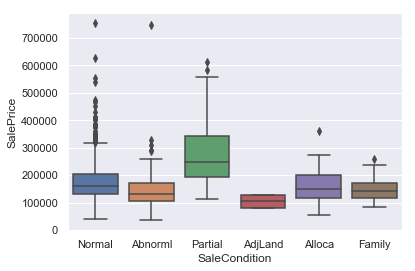

In [348]:
sns.boxplot(x='SaleCondition', y='SalePrice', data=train_data)

In [228]:
cate_cols = all_data.select_dtypes(include='object').columns


for each in all_data.columns:
    if 
    if all_data[each].value_counts().count()>=5:
            f.append(each)